# Preprocessing

In [41]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('./diabetes.csv')
df

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


## Delete missing values

In [43]:
df[df.isna().any(axis=1)]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
10000,10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20000,20000,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,NaN,0.0,Good,0.0,0.0,1.0,female,13.0,Cat3,Cat5
30000,30000,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,...,1.0,NaN,Good,0.0,0.0,0.0,female,6.0,Cat6,Cat5
40000,40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7
50000,50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8


In [44]:
df = df.drop(columns=['Unnamed: 0'])
df.drop([11691], axis=0, inplace=True)

mode = df[set(df.columns)].loc[0, :]
print(mode)
df = df.dropna(thresh=10).fillna(mode)
df[df.isna().any(axis=1)]

General Health               Medium
High Cholesterol                0.0
Stroke                          0.0
Education                      Cat6
Heavy Alcohol Consumption       0.0
Physical Activity               1.0
Mental Health                   5.0
Sex                            male
No Doctor because of Cost       0.0
Smoker                          0.0
Difficulty Walking              0.0
Income                         Cat8
Fruits                          0.0
Cholesterol Check               1.0
HighBP                          1.0
Veggies                         1.0
Diabetes_binary                 0.0
Any Health Care                 1.0
Age                             4.0
HeartDiseaseorAttack            0.0
Physical Health                30.0
BMI                            26.0
Name: 0, dtype: object


,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income


## Changing coloumns name

In [45]:
df.columns = df.columns.str.replace(' ', '_')
df.columns= df.columns.str.lower()
df

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,...,any_health_care,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,sex,age,education,income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


## Normalize numbers

In [46]:
num_cols = df.select_dtypes(['int64', 'float64']).columns
df[num_cols] = (df[num_cols] - df[num_cols].min()) / (df[num_cols].max() - df[num_cols].min())
df

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,...,any_health_care,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,sex,age,education,income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,0.500000,0.000000,1.0,female,1.000000,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,Cat4


## Categorical Features

In [47]:
sex_data = pd.get_dummies(df['sex'])
df = df.drop('sex',axis = 1)
df = df.join(sex_data)
df  

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,...,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,age,education,income,female,male
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,0.0,Medium,0.166667,1.000000,0.0,0.250000,Cat6,Cat8,0,1
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,0.0,Medium,0.000000,0.000000,0.0,0.916667,Cat6,Cat8,0,1
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,0.0,High,0.000000,0.333333,0.0,1.000000,Cat6,Cat8,0,1
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,0.0,Medium,0.000000,0.100000,0.0,0.833333,Cat6,Cat8,0,1
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,0.0,Good,0.000000,0.000000,0.0,0.583333,Cat5,Cat8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,0.0,Low,0.000000,0.000000,0.0,0.416667,Cat4,Cat1,1,0
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0.0,Good,0.000000,0.000000,1.0,0.750000,Cat3,Cat6,0,1
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0.0,Very Low,0.500000,0.000000,1.0,1.000000,Cat6,Cat4,1,0
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0.0,Low,0.000000,0.000000,1.0,0.833333,Cat2,Cat4,1,0


In [ ]:
df['general_health'] = df['general_health'].replace({'Very Low': 0, 'Low': 0.25, 'Medium': 0.5, 'Good': 0.75, 'High': 1})
df

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,...,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,age,education,income,female,male
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,0.0,0.50,0.166667,1.000000,0.0,0.250000,Cat6,Cat8,0,1
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,0.0,0.50,0.000000,0.000000,0.0,0.916667,Cat6,Cat8,0,1
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,0.0,1.00,0.000000,0.333333,0.0,1.000000,Cat6,Cat8,0,1
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.000000,0.100000,0.0,0.833333,Cat6,Cat8,0,1
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,0.0,0.75,0.000000,0.000000,0.0,0.583333,Cat5,Cat8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.000000,0.000000,0.0,0.416667,Cat4,Cat1,1,0
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0.0,0.75,0.000000,0.000000,1.0,0.750000,Cat3,Cat6,0,1
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0.0,0.00,0.500000,0.000000,1.0,1.000000,Cat6,Cat4,1,0
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.000000,0.000000,1.0,0.833333,Cat2,Cat4,1,0


In [ ]:
df.income.replace({'Unknown': 'Cat0'}, inplace=True)

In [ ]:
df.education = df.education.str[3:].astype('int64')
df.income = df.income.str[3:].astype('int64')

maximum = df[['income', 'education']].max()
minimum = df[['income', 'education']].min()
df[['education', 'income']] = (df[['education', 'income']] - minimum) / (maximum - minimum)

In [ ]:
df

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,...,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,age,education,income,female,male
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,0.0,0.50,0.166667,1.000000,0.0,0.250000,1.0,1.000,0,1
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,0.0,0.50,0.000000,0.000000,0.0,0.916667,1.0,1.000,0,1
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,0.0,1.00,0.000000,0.333333,0.0,1.000000,1.0,1.000,0,1
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.000000,0.100000,0.0,0.833333,1.0,1.000,0,1
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,0.0,0.75,0.000000,0.000000,0.0,0.583333,0.8,1.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.000000,0.000000,0.0,0.416667,0.6,0.125,1,0
70688,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,0.0,0.75,0.000000,0.000000,1.0,0.750000,0.4,0.750,0,1
70689,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,0.0,0.00,0.500000,0.000000,1.0,1.000000,1.0,0.500,1,0
70690,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.000000,0.000000,1.0,0.833333,0.2,0.500,1,0


## Seprating data from label

In [ ]:
labels = df.diabetes_binary
df = df.iloc[:, 1:]
df

,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,veggies,...,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,age,education,income,female,male
0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.50,0.166667,1.000000,0.0,0.250000,1.0,1.000,0,1
1,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.50,0.000000,0.000000,0.0,0.916667,1.0,1.000,0,1
2,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.00,0.000000,0.333333,0.0,1.000000,1.0,1.000,0,1
3,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.50,0.000000,0.100000,0.0,0.833333,1.0,1.000,0,1
4,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.75,0.000000,0.000000,0.0,0.583333,0.8,1.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.25,0.000000,0.000000,0.0,0.416667,0.6,0.125,1,0
70688,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.75,0.000000,0.000000,1.0,0.750000,0.4,0.750,0,1
70689,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.00,0.500000,0.000000,1.0,1.000000,1.0,0.500,1,0
70690,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.000000,0.000000,1.0,0.833333,0.2,0.500,1,0


# Model Creation

## Creating model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, random_state=64, train_size = 0.75)

In [ ]:
model = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=200,
    subsample=0.5,
    colsample_bytree=1,
    random_state=123,
    eval_metric='auc',
    verbosity=1,
    early_stopping_rounds=10
)

model.fit(X_train, y_train)

XGBClassifier(early_stopping_rounds=10, eval_metric='auc', max_depth=4,
              n_estimators=200, random_state=123, subsample=0.5)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      8862
         1.0       0.72      0.79      0.76      8811

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



## Model results

In [ ]:
def show_results(X, y, model):
    y_pred = model.predict(X)
    print('accuracy:', accuracy_score(y, y_pred))
    print('precision:', precision_score(y, y_pred))
    print('recall:', recall_score(y, y_pred))
    plot_confusion_matrix(model, X, y);
    print(confusion_matrix(y, y_pred))

accuracy: 0.7462230521133933
precision: 0.7247039268647413
recall: 0.7917376007263648


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[6212 2650]
 [1835 6976]]


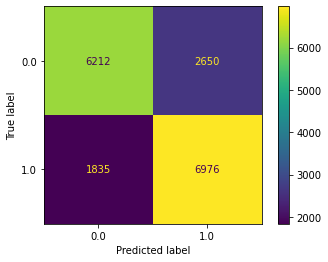

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
show_results(X_test, y_test, model)

# Set Hyper parameters

## USing GridSearchCV

In [ ]:
xgb.XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
def my_roc_auc_score(model, X, y):
    return roc_auc_score(y, model.predict_proba(X)[:,1])

In [ ]:
params = {
    'learning_rate': [0.02, 0.05, 0.1, 0.3],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1]
}

In [ ]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import GridSearchCV

model_for_eval = xgb.XGBClassifier(eval_metrics='auc', subsample=0.5,)
GS_XGB = GridSearchCV(model_for_eval, params, scoring=my_roc_auc_score, cv=3)
GS_XGB.fit(X_train, y_train, verbose=True)

GridSearchCV(cv=3, estimator=XGBClassifier(eval_metrics='auc', subsample=0.5),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7f9569d88c20>)

## Best models result

{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
accuracy: 0.7479771402704691
precision: 0.7266202018100489
recall: 0.7927590511860175


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[6234 2628]
 [1826 6985]]


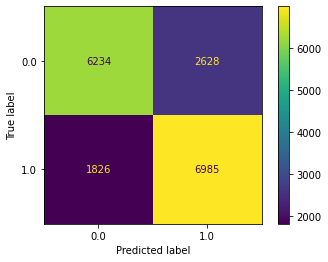

In [ ]:
print(GS_XGB.best_params_)
best_model = GS_XGB.best_estimator_
show_results(X_test, y_test, best_model)

# Plot

In [ ]:
best_model.fit(X_train, y_train)
y_pred = model.predict(X_test)

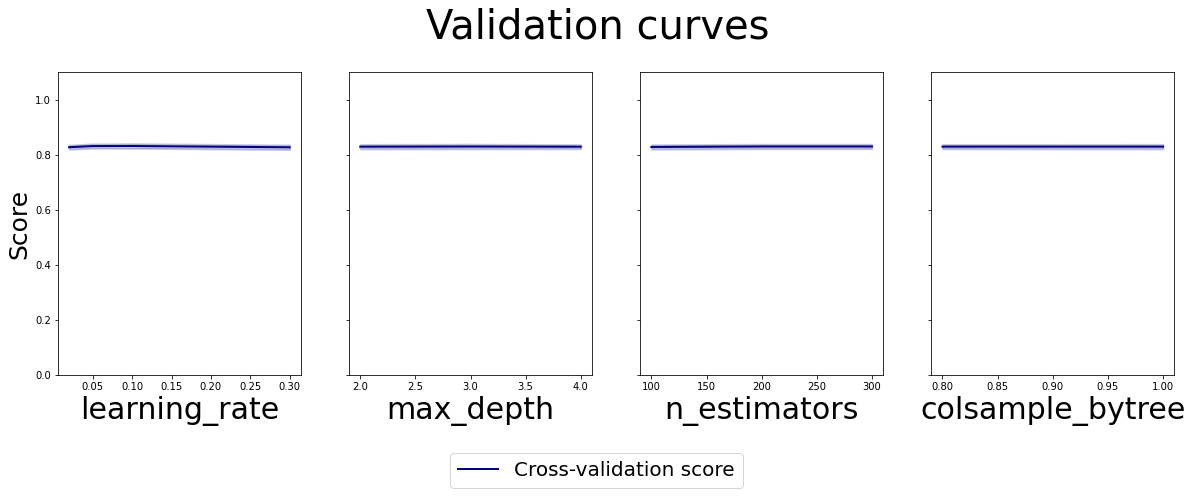

In [ ]:
import numpy as np

def pooled_var(stds):
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

df = pd.DataFrame(GS_XGB.cv_results_)
results = ['mean_test_score',
           'std_test_score']

fig, axes = plt.subplots(1, len(params), 
                         figsize = (5*len(params), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)


for idx, (param_name, param_range) in enumerate(params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_test_score': 'mean',
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    lw = 2
    axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                color="navy", lw=lw)
    axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                    color="navy", lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()
